## run the whole notebook with quad = 'A', 'B', 'C', 'D'

# Get Data

In [1]:
inst = 1
field = 'SWIRE'
quad = 'A'

## PanSTARRS data

In [2]:
datadir='../../doc/20170617_Stacking/maps/PanSTARRScats/'
df_origin = pd.read_csv(datadir + 'SWIRE_'+quad+'.csv',low_memory=False)

In [3]:
df_all = df_origin[['ra', 'dec', 'x', 'y',\
                'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', \
                'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag',\
                'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag', 'qualityFlag']].copy()

In [4]:
# select sources within 30 pix of the quad

df_all = df_all[(df_all.x > -30) & (df_all.x < 542)\
                & (df_all.y > -30) & (df_all.y < 542)\
               & (df_all.yMeanPSFMag !=-999)].copy()

In [5]:
# add flag column

flag_arr = df_all.qualityFlag
bin_values = np.flip(2 ** np.arange(11),0)
flag_bin_arr = np.zeros([len(flag_arr),len(bin_values)])

for i, flag in enumerate(flag_arr):
    bin_str = "{:011b}".format(flag)
    bin_int = list(map(int,list(bin_str)))
    flag_bin_arr[i,:] = bin_int

for i,bin_value in enumerate(bin_values):
    df_all['flag{}'.format(bin_value)] = flag_bin_arr[:,i].astype(int)

In [6]:
# select flag 8 == 1 | flag 16 == 1

df_all = df_all[(df_all.flag8 == 1) | (df_all.flag16 == 1)].copy()
df_all = df_all[['ra', 'dec', 'x', 'y',\
                'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', \
                'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag',\
                'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag']].copy()

In [7]:
df_all.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,rMeanKronMag,iMeanKronMag,zMeanKronMag,yMeanKronMag,gMeanApMag,rMeanApMag,iMeanApMag,zMeanApMag,yMeanApMag
26,243.430510,55.657698,56.070832,335.302958,10.409,9.67,9.366,9.199,9.104,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
29,243.617239,54.978434,406.707213,280.004144,10.458,9.68,9.395,9.253,9.149,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
39,244.467465,55.395409,189.051777,30.739303,10.887,10.02,9.675,9.486,9.359,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
48,244.002096,55.015998,386.589086,166.057352,12.286,10.88,10.201,9.758,9.505,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
79,244.377702,55.148189,317.047094,55.459792,10.555,10.17,10.050,10.020,10.008,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [8]:
df_all.describe()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,rMeanKronMag,iMeanKronMag,zMeanKronMag,yMeanKronMag,gMeanApMag,rMeanApMag,iMeanApMag,zMeanApMag,yMeanApMag
count,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000
mean,243.717657,55.256051,262.522851,250.558773,-248.986111,-57.220713,5.055660,-14.477577,18.874136,-286.377305,-84.232382,-8.860870,-31.120852,-91.845100,-256.715853,-66.523765,-4.497940,-22.636660,7.970827
std,0.566270,0.312808,161.478053,166.611662,449.485148,269.756660,120.760017,182.028606,1.526563,467.417912,308.608821,167.426116,220.408144,316.561441,453.422018,283.882943,154.268032,201.722641,104.201322
min,242.718364,54.708895,-20.762067,-29.950673,-999.000000,-999.000000,-999.000000,-999.000000,9.104000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,243.223640,54.985626,121.684121,103.878265,-999.000000,18.792500,18.832100,18.359600,18.416401,-999.000000,18.411699,18.600800,18.178900,17.402700,-999.000000,18.628799,18.632000,18.208900,18.187401
50%,243.728280,55.259580,260.485865,247.400356,20.228701,20.450800,20.083700,19.672501,19.474100,19.756599,20.086100,19.807501,19.417999,18.897499,19.955099,20.121000,19.778000,19.386499,19.133499
75%,244.216984,55.529213,401.796824,395.981587,21.557699,21.272200,20.765301,20.321600,19.841400,21.179001,20.979601,20.531700,20.108999,19.520901,21.238199,21.000000,20.490900,20.065201,19.640800
max,244.682889,55.799985,541.973664,541.935519,29.458000,25.513000,22.442400,21.477501,21.330700,23.231100,23.152800,22.804100,21.572300,20.971300,28.683001,25.379999,24.054100,23.274900,27.648001


In [9]:
df = df_all.copy()

## UKIDSS data

In [10]:
catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'

ukdfname = list(pd.read_csv(catcoorddir+'UKIDSS/'+field+'_'+quad+'_uk.txt',header=0,sep='|'))
ukdf = pd.read_csv(catcoorddir+'UKIDSS/'+field+'_'+quad+'_uk.txt',header=0,sep=',',names=ukdfname)

# Match PanSTARRS to UKIDSS

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

coorduk = SkyCoord(ra=ukdf['ra']*u.degree, dec=ukdf['dec']*u.degree, frame='icrs')
coordps = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')

idx, d2d,_ = match_coordinates_sky(coordps, coorduk)

In [12]:
df['uk_mAB_I'] = np.array(ukdf.iloc[idx].mAB_I)
df['uk_mAB_H'] = np.array(ukdf.iloc[idx].mAB_I)
df['uk_mAB_j'] = np.array(ukdf.iloc[idx].mAB_j)
df['uk_mAB_k'] = np.array(ukdf.iloc[idx].mAB_k)
df['dmatch_arcsec'] = d2d.arcsec
df['dm_y'] = df['yMeanPSFMag'] - df['uk_mAB_I']
df['mergedClass'] = np.array(ukdf.iloc[idx].mergedClass)
df['pstar'] = np.array(ukdf.iloc[idx].pstar)
df['pgalaxy'] = np.array(ukdf.iloc[idx].pgalaxy)
df['pnoise'] = np.array(ukdf.iloc[idx].pnoise)
df['psaturated'] = np.array(ukdf.iloc[idx].psaturated)

df=df.reset_index(drop=True)

In [13]:
df.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,...,uk_mAB_H,uk_mAB_j,uk_mAB_k,dmatch_arcsec,dm_y,mergedClass,pstar,pgalaxy,pnoise,psaturated
0,243.430510,55.657698,56.070832,335.302958,10.409,9.67,9.366,9.199,9.104,-999.0,...,10.925,10.925,11.572,0.195305,-1.821,-1,0.993865,0.003067,0.003067,0.0
1,243.617239,54.978434,406.707213,280.004144,10.458,9.68,9.395,9.253,9.149,-999.0,...,12.005,12.005,12.821,0.124660,-2.856,-1,0.993865,0.003067,0.003067,0.0
2,244.467465,55.395409,189.051777,30.739303,10.887,10.02,9.675,9.486,9.359,-999.0,...,11.865,11.865,12.633,0.137368,-2.506,-1,0.993865,0.003067,0.003067,0.0
3,244.002096,55.015998,386.589086,166.057352,12.286,10.88,10.201,9.758,9.505,-999.0,...,11.850,11.850,12.876,0.101436,-2.345,-1,0.993865,0.003067,0.003067,0.0
4,244.377702,55.148189,317.047094,55.459792,10.555,10.17,10.050,10.020,10.008,-999.0,...,11.794,11.794,12.370,0.716361,-1.786,-1,0.993865,0.003067,0.003067,0.0


In [14]:
df.describe()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanKronMag,...,uk_mAB_H,uk_mAB_j,uk_mAB_k,dmatch_arcsec,dm_y,mergedClass,pstar,pgalaxy,pnoise,psaturated
count,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,...,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.0
mean,243.717657,55.256051,262.522851,250.558773,-248.986111,-57.220713,5.055660,-14.477577,18.874136,-286.377305,...,18.863631,18.835454,18.705115,0.113125,0.010505,-0.114359,0.522936,0.471905,0.005159,0.0
std,0.566270,0.312808,161.478053,166.611662,449.485148,269.756660,120.760017,182.028606,1.526563,467.417912,...,1.655394,1.801641,1.908040,0.193748,0.524207,1.041500,0.486811,0.486979,0.024127,0.0
min,242.718364,54.708895,-20.762067,-29.950673,-999.000000,-999.000000,-999.000000,-999.000000,9.104000,-999.000000,...,10.925000,0.000000,0.000000,0.000893,-6.347100,-3.000000,0.003067,0.003067,0.003067,0.0
25%,243.223640,54.985626,121.684121,103.878265,-999.000000,18.792500,18.832100,18.359600,18.416401,-999.000000,...,18.188000,18.176000,18.133000,0.055407,-0.076799,-1.000000,0.003067,0.003067,0.003067,0.0
50%,243.728280,55.259580,260.485865,247.400356,20.228701,20.450800,20.083700,19.672501,19.474100,19.756599,...,19.294000,19.292000,19.006000,0.088966,0.134300,-1.000000,0.993865,0.003067,0.003067,0.0
75%,244.216984,55.529213,401.796824,395.981587,21.557699,21.272200,20.765301,20.321600,19.841400,21.179001,...,19.928000,19.926000,19.724000,0.132557,0.285401,1.000000,0.993865,0.993865,0.003067,0.0
max,244.682889,55.799985,541.973664,541.935519,29.458000,25.513000,22.442400,21.477501,21.330700,23.231100,...,23.869000,23.869000,23.147000,9.133953,2.836901,1.000000,0.993865,0.993865,0.486486,0.0


# clean up out of UKIDSS survey range

In [15]:
if quad == 'C':
    mask = (df.y < 120) & (df.x > 288)
    df.loc[mask,'mergedClass'] = -2

if quad == 'D':
    mask = (df.y > 468) & (df.x > 288)
    df.loc[mask,'mergedClass'] = -2    

# Visualize the match

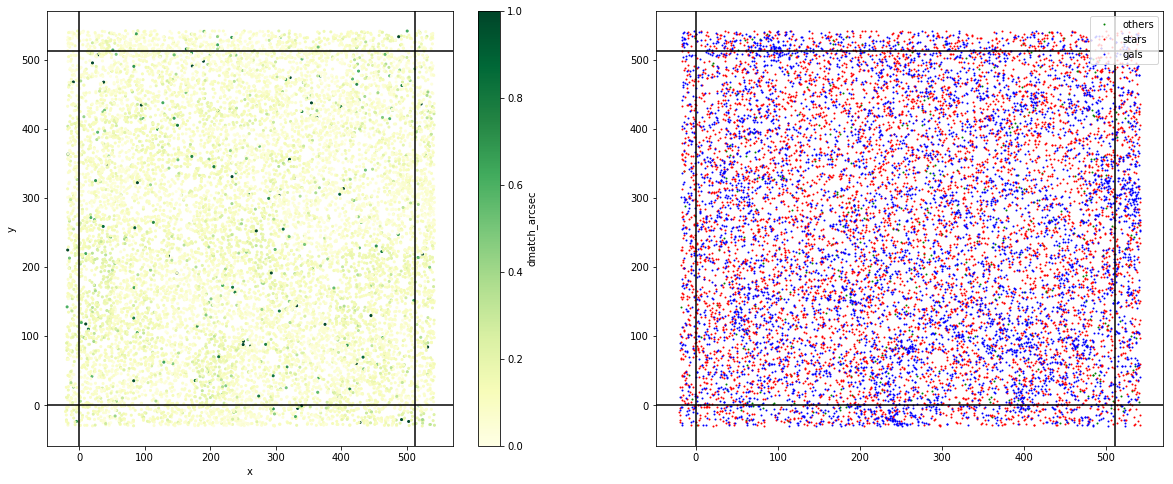

In [16]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
df.plot(kind='scatter',x='x',y='y',c='dmatch_arcsec',colormap='YlGn',s=4,marker='o',ax=ax[0],vmax=1,vmin=0)
ax[0].axhline(0,c='k')
ax[0].axvline(0,c='k')
ax[0].axhline(512,c='k')
ax[0].axvline(512,c='k')

groups = df.groupby('mergedClass')
namedict={1:'gals',-1:'stars',-2:'others',-3:'others'}
cdict={1:'b',-1:'r',-2:'g',-3:'g'}
for name, group in groups:
    ax[1].plot(group.x, group.y, marker='o', linestyle='', ms=1, label=namedict[name],c=cdict[name])
ax[1].legend(loc=0)
ax[1].axhline(0,c='k')
ax[1].axvline(0,c='k')
ax[1].axhline(512,c='k')
ax[1].axvline(512,c='k')

plt.savefig('flag816_map{}.png'.format(quad),dpi=256,bbox_inches='tight')

In [17]:
idxstr=np.arange(len(df))[df.mergedClass == -1]
idxgal=np.arange(len(df))[df.mergedClass == 1]

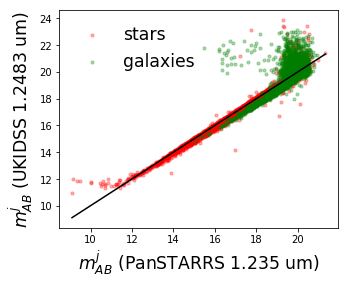

In [18]:
fig, ax =plt.subplots(1,1,figsize=[5,4])

ax.scatter(df.yMeanPSFMag[idxstr],df.uk_mAB_I[idxstr],c='r',s=10,alpha=0.3,label='stars')
ax.scatter(df.yMeanPSFMag[idxgal],df.uk_mAB_I[idxgal],c='g',s=10,alpha=0.3,label='galaxies')
ax.plot([min(df.yMeanPSFMag),max(df.yMeanPSFMag)],[min(df.yMeanPSFMag),max(df.yMeanPSFMag)],'k')
ax.set_xlabel(r'$m_{AB}^j$ (PanSTARRS 1.235 um)',fontsize='xx-large')
ax.set_ylabel(r'$m_{AB}^j$ (UKIDSS 1.2483 um)',fontsize='xx-large')
ax.legend(loc=0,frameon=False,fontsize='xx-large')

plt.savefig('flag816_mag_corr{}.png'.format(quad),dpi=256,bbox_inches='tight')

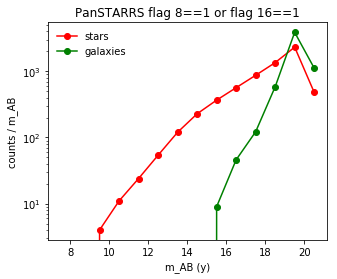

In [19]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

binedges = np.arange(7,22,1)
bins = (binedges[:-1] + binedges[1:])/2

shist,_ = np.histogram(df['yMeanPSFMag'][(df.mergedClass==-1)], bins = binedges)
ax.plot(bins,shist,'ro-',label='stars')
ghist,_ = np.histogram(df['yMeanPSFMag'][(df.mergedClass==1)], bins = binedges)
ax.plot(bins,ghist,'go-',label='galaxies')

ax.set_yscale('log')
ax.set_xlabel('m_AB (y)')
ax.set_ylabel('counts / m_AB')
ax.set_title('PanSTARRS flag 8==1 or flag 16==1')
ax.legend(loc=0, frameon = False)

plt.savefig('flag816_sghist{}.png'.format(quad),dpi=256,bbox_inches='tight')

# Save 

In [44]:
print(list(df.columns))

['ra', 'dec', 'x', 'y', 'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', 'gMeanKronMag', 'rMeanKronMag', 'iMeanKronMag', 'zMeanKronMag', 'yMeanKronMag', 'gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag', 'uk_mAB_I', 'uk_mAB_H', 'uk_mAB_j', 'uk_mAB_k', 'dmatch_arcsec', 'dm_y', 'mergedClass', 'pstar', 'pgalaxy', 'pnoise', 'psaturated']


In [45]:
fname = 'TM'+ str(inst) + '_' + field + '_' + quad + '_matched.csv'
df.to_csv(fname)

In [46]:
df_short = df[['ra', 'dec', 'x', 'y',\
               'gMeanPSFMag', 'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag',\
                'dmatch_arcsec', 'mergedClass', 'pstar', 'pgalaxy', 'pnoise']].copy()
fname=catcoorddir+'PanSTARRS/'+field+'_'+quad+'_PS_matched.txt'
df_short.to_csv(fname,index=False)